In [1]:
################################################################################################################################
############################## PRACTICA NLP: Jordi Ortega - IA2 ################################################################
################################################################################################################################

# 0. Ejercicio 3. Etapa de entrenamiento y testeo de un modelo de análisis de sentimiento
# 0. Ejercicio 4. Reporte de métricas y conclusiones

# 1. Cargamos el dataset -> Cargamos el dataset ya preprocesado.
# 2. Machine Learning -> Aplicamos un xgboost de clasificación binaria
# 3. Deep Learning -> Aplicamos una red neuronal con LSTM
# 4. Conclusiones

In [2]:
################################################################################################################################
############################## CARGAMOS DATASET ################################################################################
################################################################################################################################

In [3]:
# Data Source: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews
# 2023 version
# Bridging Language and Items for Retrieval and Recommendation
# Yupeng Hou, Jiacheng Li, Zhankui He, An Yan, Xiusi Chen, Julian McAuley

In [4]:
import pandas as pd
df_unigram = pd.read_csv('df_sports_outdoors_unigram.csv')
df_unigram.head(5)

,Unnamed: 0,sentiment,title,review,sentiment_label,review_clean
0,0,5.0,"Greatly impressed, I recommend these","Ordered a few bags, put some in mine and my c...",0,"['ordered', 'bag', 'put', 'mine', 'child', 'gl..."
1,1,5.0,Great Lures,Nice quality lures heavy duty,0,"['nice', 'quality', 'heavy', 'duty']"
2,2,5.0,Perfect for what I needed,Lost mine in a move. Perfect for what I needed.,0,"['lost', 'mine', 'move', 'perfect', 'needed']"
3,3,5.0,Great Product,Great quality. Adjustable from 22lbs-88lbs of...,0,"['great', 'quality', 'adjustable', 'tension']"
4,4,5.0,Great box,This mini Tackle box comes with so many fishin...,0,"['box', 'come', 'many', 'fishing', 'make', 'fi..."


In [5]:
################################################################################################################################
############################## MACHINE LEARNING ################################################################################
################################################################################################################################

In [6]:
from sklearn.model_selection import train_test_split

# Determinamos los valores de X e y (siendo X los tokens resultantes del preprocesado)
X = df_unigram['review_clean']
y = df_unigram['sentiment_label']

# Dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,  stratify=y)

In [7]:
print(X_train.iloc[0])

['people', 'without', 'hand', 'strength']


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Transformamos el texto en representaciones númericas y limitamos a 5K el vocabulario (palabras más frecuentes). El vocabulario quedará por debajo de este límite.
def extract_BoW_features(words_train, words_test, vocabulary_size=5000):
    vectorizer = CountVectorizer(max_features=vocabulary_size, analyzer='word', tokenizer=None)

    # Aprendemos el vocabulario y lo aplicamos en test
    features_train = vectorizer.fit_transform(words_train).toarray()
    features_test = vectorizer.transform(words_test).toarray()

    # Guardamos el vocabulario
    vocabulary = vectorizer.vocabulary_

    return features_train, features_test, vocabulary

# Extraemos las características de Bag of Words
features_train, features_test, vocabulary = extract_BoW_features(X_train, X_test)

In [9]:
print("Tamaño del vocabulario:", len(vocabulary))

Tamaño del vocabulario: 998


In [10]:
# Vocabulario aprendido por el vectorizador
print("Vocabulario:", vocabulary)

# Primer vector BoW
print("Vector BoW para la primera reseña:", features_train[0])

# Comparamos con los tokens originales
print("Tokens de la primera reseña:", X_train.iloc[0])

# Accedemos a la palabra 'without' para comprobar que el bector BoW lo recoge correctamente
print("Valor en la posición 975 del vector BoW para la primera reseña:", features_train[0][975])

Vocabulario: {'people': 596, 'without': 975, 'hand': 361, 'strength': 823, 'price': 638, 'wrong': 989, 'need': 543, 'whistle': 965, 'use': 920, 'group': 354, 'thing': 863, 'hear': 370, 'item': 429, 'soon': 793, 'put': 658, 'roller': 708, 'worked': 981, 'pretty': 637, 'well': 960, 'far': 281, 'slip': 775, 'mat': 506, 'slide': 773, 'bit': 86, 'really': 675, 'big': 83, 'enough': 248, 'knee': 443, 'like': 471, 'doe': 221, 'metal': 516, 'part': 592, 'product': 643, 'think': 864, 'great': 350, 'heavy': 374, 'purpose': 656, 'fine': 296, 'real': 674, 'cheap': 139, 'one': 567, 'returned': 698, 'right': 703, 'away': 55, 'trust': 899, 'made': 498, 'nice': 549, 'zipper': 997, 'thicker': 860, 'expected': 265, 'comfortable': 158, 'strong': 826, 'work': 980, 'lose': 489, 'came': 117, 'riding': 702, 'day': 196, 'fall': 277, 'good': 346, 'replacement': 691, 'compact': 162, 'first': 299, 'two': 906, 'keep': 435, 'home': 391, 'older': 566, 'wearing': 955, 'purchased': 655, 'new': 547, 'however': 403, 'mo

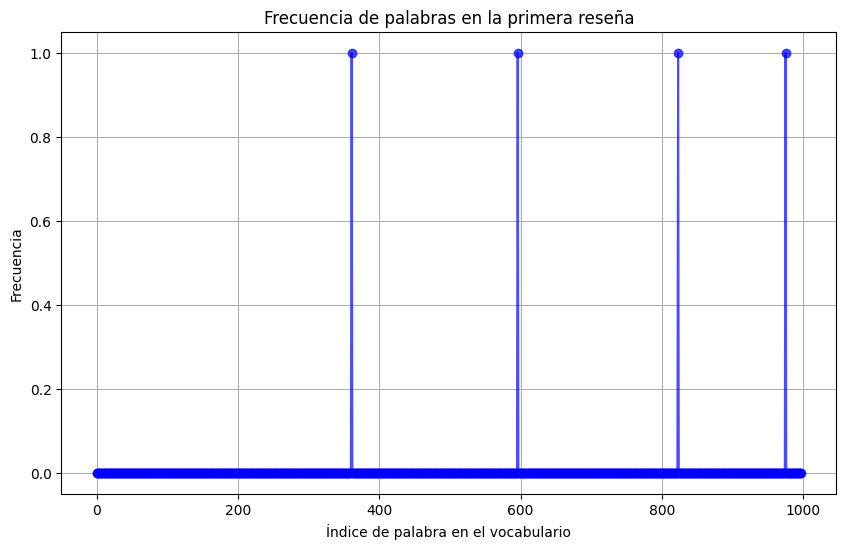

In [11]:
import matplotlib.pyplot as plt

# Graficamos la frecuencia de las palabras para la muestra de la reseña 1 en features_train
plt.figure(figsize=(10, 6))
plt.plot(features_train[0, :], marker='o', linestyle='-', color='b', alpha=0.7)
plt.xlabel('Índice de palabra en el vocabulario')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de palabras en la primera reseña')
plt.grid(True)
plt.show()

In [12]:
# Vamos a normalizar para asegurar que las características tengan el mismo rango lo que ayudará a los algoritmos
import sklearn.preprocessing as pr

features_train = pr.normalize(features_train, axis=1)
features_test = pr.normalize(features_test, axis=1)

In [13]:
print(f"X_train shape: {features_train.shape}")
print(f"X_test shape: {features_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3908, 998)
X_test shape: (978, 998)
y_train shape: (3908,)
y_test shape: (978,)


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 32

def classify_gboost(features_train, features_test, y_train, y_test):
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=42)

    # Entrenamiento del modelo con los datos numéricos
    clf.fit(features_train, y_train)

    # Evaluación de precisión (accuracy) con los datos numéricos
    print("[{}] Accuracy: train = {}, test = {}".format(
            clf.__class__.__name__,
            clf.score(features_train, y_train),
            clf.score(features_test, y_test)))

    return clf

# Entrenamos el modelo
clf2 = classify_gboost(features_train, features_test, y_train, y_test)

[GradientBoostingClassifier] Accuracy: train = 0.7781473899692938, test = 0.7494887525562373


In [15]:
# Métricas del modelo
# - precision_score: Mide la proporción de verdaderos positivos sobre todos los ejemplos clasificados como positivos (es decir, cuántos de los elementos que el modelo clasificó como positivos realmente lo son).
# - recall_score: Mide la proporción de verdaderos positivos sobre todos los ejemplos que realmente son positivos (es decir, cuántos de los ejemplos positivos el modelo fue capaz de identificar).
# - f1_score: Es la media armónica de la precisión y el recall

from sklearn.metrics import precision_score, recall_score, f1_score

# Hacemos predicciones
y_pred_train = clf2.predict(features_train)
y_pred_test = clf2.predict(features_test)

# Calculamos las métricas de evaluación para el conjunto de entrenamiento
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Calculamos las métricas de evaluación para el conjunto de prueba
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"--- Train Set Metrics ---")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")

print(f"\n--- Test Set Metrics ---")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")

# Nota la predicción en train se realiza sólo como referencia

--- Train Set Metrics ---
Precision: 0.7290
Recall: 0.8111
F1 Score: 0.7679

--- Test Set Metrics ---
Precision: 0.7006
Recall: 0.7783
F1 Score: 0.7374


In [16]:
# Verdadero Positivo (True Positive, TP):
# Son los casos en los que el modelo predice que la reseña es negativa (sentiment_label = 1), y realmente es negativa (sentiment_label = 1).

# Verdadero Negativo (True Negative, TN):
# Son los casos en los que el modelo predice que la reseña es positiva (sentiment_label = 0), y realmente es positiva (sentiment_label = 0).

# Falso Positivo (False Positive, FP):
# Son los casos en los que el modelo predice que la reseña es negativa (sentiment_label = 1), pero en realidad es positiva (sentiment_label = 0).

# Falso Negativo (False Negative, FN):
# Son los casos en los que el modelo predice que la reseña es positiva (sentiment_label = 0), pero en realidad es negativa (sentiment_label = 1).

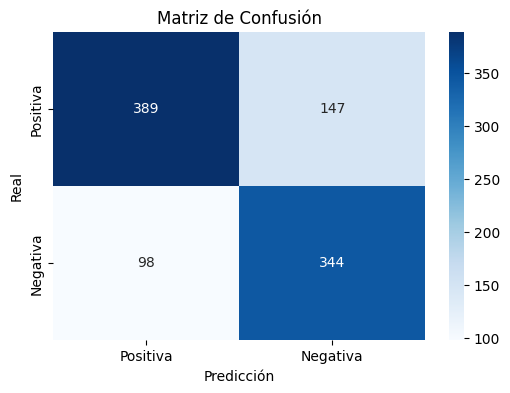

Matriz de Confusión:
[[389 147]
 [ 98 344]]


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones del modelo
y_pred = clf2.predict(features_test)

# Generamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positiva", "Negativa"], yticklabels=["Positiva", "Negativa"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


print("Matriz de Confusión:")
print(cm)

In [18]:
# Conclusiones del modelo:
# 1. El modelo obtiene un buen rendimiento en general (equilibrio entre precisión y recall)
# 2. El modelo tiene capacidad para identificar casos positivos (recall)
# 3. El modelo tiene una precisión superior en train que en test ("falsas alarmas")
# 4. Las métricas estan ajustadas en train y test así que descartamos sobreajuste
# 5. Deberíamos seguir iterando con el modelo y sus hiperparámetros para mejorar el rendimiento
# 6. Podríamos aumentar el dataset usado en los modelos

In [19]:
################################################################################################################################
############################## DEEP LEARNING ###################################################################################
################################################################################################################################

In [20]:
# En DL no se valora el trabajo con n-gramas ya que los propios algoritmos aprenden dependencias contextuales.

In [21]:
# Volvemos a cargar el dataset
import pandas as pd
df_unigram = pd.read_csv('df_sports_outdoors_unigram.csv')
df_unigram.head(5)

,Unnamed: 0,sentiment,title,review,sentiment_label,review_clean
0,0,5.0,"Greatly impressed, I recommend these","Ordered a few bags, put some in mine and my c...",0,"['ordered', 'bag', 'put', 'mine', 'child', 'gl..."
1,1,5.0,Great Lures,Nice quality lures heavy duty,0,"['nice', 'quality', 'heavy', 'duty']"
2,2,5.0,Perfect for what I needed,Lost mine in a move. Perfect for what I needed.,0,"['lost', 'mine', 'move', 'perfect', 'needed']"
3,3,5.0,Great Product,Great quality. Adjustable from 22lbs-88lbs of...,0,"['great', 'quality', 'adjustable', 'tension']"
4,4,5.0,Great box,This mini Tackle box comes with so many fishin...,0,"['box', 'come', 'many', 'fishing', 'make', 'fi..."


In [22]:
# Seleccionamos datos
X = df_unigram['review_clean']
y = df_unigram['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,  stratify=y)

In [23]:
print(X_train.iloc[0])

['people', 'without', 'hand', 'strength']


In [24]:
import numpy as np

# Establecemos el tamaño de las neuronas, como tamaño de la neurona usaremos una media una vez ubicado el percentil
max_length = 0
mean = []

for example in X_train:
    length = len(example)
    mean.append(length)
    if length > max_length:
        max_length = length

average = sum(mean) / len(mean)
print("Media:", average)

p95 = np.percentile(mean, 95)
print("Percentil 95:", p95)

filtered_lengths = [length for length in mean if length <= p95]
filtered_mean = sum(filtered_lengths) / len(filtered_lengths)
print("Media después del percentil 95:", filtered_mean)

print("El tamaño máximo:", max_length)

Media: 231.22697031729786
Percentil 95: 772.2999999999993
Media después del percentil 95: 177.63577586206895
El tamaño máximo: 4188


In [25]:
import ast

# Creamos el vocabulario único
vocabulario_unico = set()

for review in df_unigram['review_clean']:
    tokens = ast.literal_eval(review)
    vocabulario_unico.update(tokens)

print("Número de palabras únicas:", len(vocabulario_unico))
print("Primeras 10 palabras del vocabulario:", list(vocabulario_unico)[:10])

Número de palabras únicas: 998
Primeras 10 palabras del vocabulario: ['especially', 'bug', 'house', 'valve', 'offer', 'average', 'second', 'wife', 'cover', 'built']


In [26]:
!pip install keras
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 83.6 MB/s eta 0:00:00


In [27]:
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, GRU, SimpleRNN

vocabulary_size = 998 # Tamaño máximo de vocabulario disponible
max_words=177 # Longitud de cada reseña (estimación en paso anterior)
embedding_size = 32 # Vector denso de 32 dimensiones que define cada palabra

model = Sequential()
model.add(Embedding(vocabulary_size , embedding_size, input_length=max_words))
model.add(LSTM(100)) # número de neuronas en la capa LSTM
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
# Definimos las métricas del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizamos
tokenizer = Tokenizer(num_words=998)
tokenizer.fit_on_texts(X_train)

# Convertimos las palabras a índices
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Rellenamos las secuencias para que tengan la misma longitud definida anteriormente
X_train_pad = pad_sequences(X_train_seq, maxlen=max_words)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_words)

In [30]:
batch_size = 64
num_epochs = 1

# Separamos un conjunto de validación del 10% de los datos
val_size = int(0.1 * len(X_train_pad))
X_valid, y_valid = X_train_pad[:val_size], y_train[:val_size]
X_train_pad2, y_train2 = X_train_pad[val_size:], y_train[val_size:]

model.fit(X_train_pad2, y_train2,
          validation_data=(X_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)

55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 523ms/step - accuracy: 0.5595 - loss: 0.6820 - val_accuracy: 0.6846 - val_loss: 0.6061


In [31]:
# El modelo tiene poco accuracy en train como en val, con lo que aumentamos epocas.

batch_size = 64
num_epochs = 10

val_size = int(0.1 * len(X_train_pad))
X_valid, y_valid = X_train_pad[:val_size], y_train[:val_size]
X_train_pad2, y_train2 = X_train_pad[val_size:], y_train[val_size:]

model.fit(X_train_pad2, y_train2,
          validation_data=(X_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)

# El modelo mejora notablemente el resultado

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 264ms/step - accuracy: 0.7417 - loss: 0.5487 - val_accuracy: 0.7641 - val_loss: 0.5168
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.8175 - loss: 0.4205 - val_accuracy: 0.7641 - val_loss: 0.5237
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 0.8478 - loss: 0.3532 - val_accuracy: 0.7615 - val_loss: 0.5359
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.8764 - loss: 0.2963 - val_accuracy: 0.7462 - val_loss: 0.5616
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 305ms/step - accuracy: 0.8859 - loss: 0.2778 - val_accuracy: 0.7590 - val_loss: 0.5850
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 266ms/step - accuracy: 0.8969 - loss: 0.2557 - val_accuracy: 0.7590 - val_loss: 0.5876
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.9148 - loss: 0.2270 - val_accuracy: 0.7564 - val_loss: 0.6510
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.9121 - loss: 0.2243 - val_accu

In [32]:
import os
model.save('./lstm_model.keras')

In [33]:
scores = model.evaluate(X_test_pad, y_test, verbose=0)
print("Test accuracy:", scores[1])

Test accuracy: 0.765848696231842


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Obtenemos las predicciones
y_pred_train = model.predict(X_train_pad)
y_pred_test = model.predict(X_test_pad)

# Asignamos el umbral
y_pred_train = (y_pred_train > 0.5).astype("int32")
y_pred_test = (y_pred_test > 0.5).astype("int32")

# Calculamos las métricas de evaluación del modelo para train
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Calculamos las métricas de evaluación del modelo para test
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"--- Train Set Metrics ---")
print(f"Precisión: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")

print(f"\n--- Test Set Metrics ---")
print(f"Precisión: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")

# Nota la predicción en train se realiza sólo como referencia

123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step
--- Train Set Metrics ---
Precisión: 0.9332
Recall: 0.9010
F1 Score: 0.9168

--- Test Set Metrics ---
Precisión: 0.7643
Recall: 0.6968
F1 Score: 0.7290


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


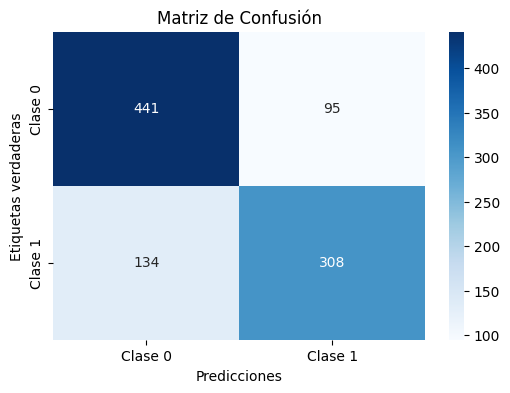

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtenemos las predicciones
y_pred_prob = model.predict(X_test_pad)

# Asignamos el umbral
y_pred = (y_pred_prob > 0.5).astype("int32")

# Generamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas verdaderas")
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
# Conclusiones del modelo:
# 1. El modelo obtiene un buen accuracy pero está sobreajustado (los resultados son significativamente mejores en train que en test)
# 2. El modelo ha aprendido patrones específicos de train y no generalizza tan bien
# 3. Posibles siguientes iteraciones para mejorar el modelo:
#       3.1. Aumentar el dataset ya que disponemos de registros no usados
#       3.2. Disminuir la complejidad del modelo
#       3.3. Aplicar técnicas de regularización
# 4. En cualquier caso, la evaluación en test no es mala (aunque claramente mejorable)
#       4.1. Precisión 76% -> De todas las predicciones positivas, el 76% fue correcto
#       4.2. Recall 70% -> Identificamos el 70% de las verdades instancias positivas
# 5. Podemos valores que el 76% en accuracy en test en un modelo balanceado es un resultado correcto.

In [ ]:
################################################################################################################################
############################## CONCLUSIONES ####################################################################################
################################################################################################################################

In [ ]:
# ¿Qué modelo seleccionar?
# En este caso los resultados obtenidos son parejos, aunque el modelo de DL requiere de un trabajo extra para evitar el sobreajuste.
# Si el scope del proyecto es el "resuelto" en esta practica me quedaría con el de ML, pero en un contexto corporativo
# donde asumo que la clasificación binaria de las "reviews" es un primer paso de muchos otros, creo que sería conveniente
# terminar de ajustar el modelo de DL para tener una herramienta con mucho más potencial y así poder encarar requisitos
# futuros como:
# - detectar matices... como la ironía o el sarcasmo
# - generar textos... como resumenes de las reviews
# - desarrollar chatbots
# Además podríamos aprovechar aprendizajes de modelos creados con grandes corpus.